In [29]:
#Using the Keras Example Here: https://keras.io/examples/vision/mnist_convnet/

import numpy as np
import keras
from keras import layers
from matplotlib import pyplot as plt

In [30]:
#Model / data parameters
num_classes = 10
input_shape = (28,28,1)

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [31]:
#Scale the images to the [0,1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
#Make sure images have shape (28,28,1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test_samples")

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test_samples


Label: 5


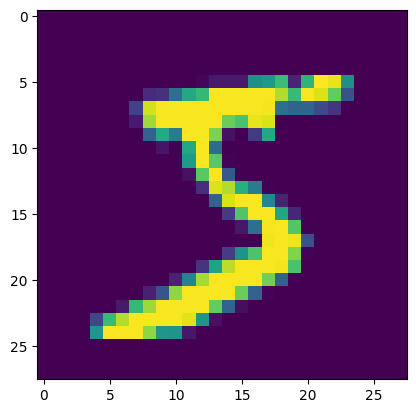

In [32]:
#Visualize an image from the training set
plt.imshow(x_train[0])
print(f"Label: {y_train[0]}")

In [33]:
#Convert class vectors to binary class amtricies
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [34]:
model = keras.Sequential(
    [
    keras.Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3,3), activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation="relu"),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation="softmax")
    ]
)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
batch_size = 128
epochs = 15
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.7638 - loss: 0.7592 - val_accuracy: 0.9775 - val_loss: 0.0848
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9620 - loss: 0.1249 - val_accuracy: 0.9863 - val_loss: 0.0572
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9736 - loss: 0.0888 - val_accuracy: 0.9873 - val_loss: 0.0465
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9782 - loss: 0.0724 - val_accuracy: 0.9890 - val_loss: 0.0420
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9816 - loss: 0.0631 - val_accuracy: 0.9902 - val_loss: 0.0376
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9824 - loss: 0.0566 - val_accuracy: 0.9902 - val_loss: 0.0374
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9856 - loss: 0.0465 - val_accuracy: 0.9910 - val_loss: 0.0344
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9857 - loss: 0.0457 - val_accuracy: 0

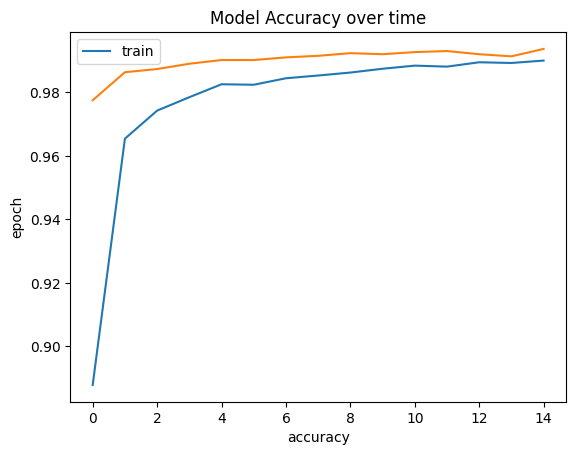

In [37]:
#Plot model history - accuracy
#Help from stack overflow: https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy over time")
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['train'])

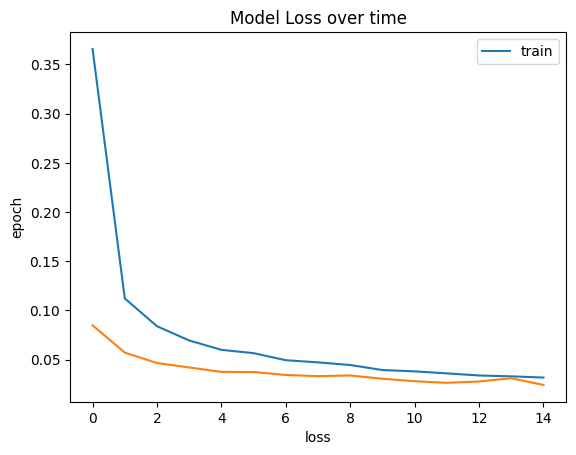

In [38]:
#Plot model history - loss
#Help from stack overflow: https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss over time")
plt.xlabel('loss')
plt.ylabel('epoch')
plt.legend(['train'])

In [39]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])


Test loss: 0.02510116808116436
Test accuracy: 0.991100013256073


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Prediction: 7
Actual: 7


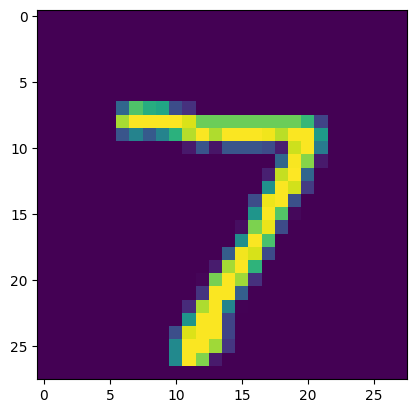

In [40]:
#Visualize a test set image and prediction
predict_y = model.predict(x_test)
#Visualize an image from the training set
plt.imshow(x_test[0])
print(f"Prediction: {np.argmax(predict_y[0])}")
print(f"Actual: {np.argmax(y_test[0])}")